In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator, FuncFormatter

color_green = '#7ba79d'
color_blue = '#94b6d2'
color_orange = '#f67828'#dd8047'


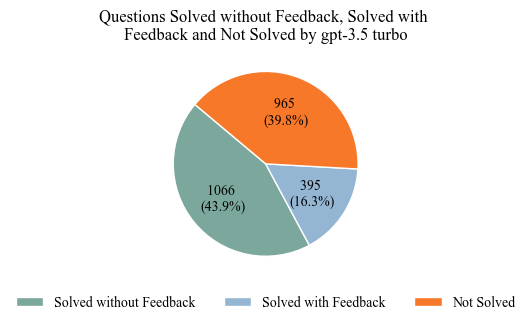

In [3]:
def total_solved_pie(df, model, location):
    not_solved_count = df[df['ChatGPT solved'] == 'No'].shape[0]
    sloved_wo = df[(df['ChatGPT solved'] == 'Yes') & (df['Iteration Solved/ Failed'] == 1)].shape[0]
    solved_wf = df[(df['ChatGPT solved'] == 'Yes') & (df['Iteration Solved/ Failed'] != 1)].shape[0]
    labels = ['Solved without Feedback', 'Solved with Feedback', 'Not Solved']
    sizes = [sloved_wo, solved_wf, not_solved_count]
    colors = [color_green, color_blue, color_orange]

    plt.rcParams["font.family"] = "Times New Roman"
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{val} \n({pct:.1f}%)'

        return my_format

    plt.figure(figsize=(5, 3))
    wedges, texts, autotexts = plt.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    plt.legend(wedges, labels, loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
    plt.title('Questions Solved without Feedback, Solved with \nFeedback and Not Solved by '+model, fontsize=12)
    plt.show()


file_path = '.\Solutions\Run5\GPT3.5\ResponseList_gpt-3.5-turbo_no_order.xlsx'
df = pd.read_excel(file_path)
total_solved_pie(df, "gpt-3.5 turbo", ".\ImagesAndGraphs")



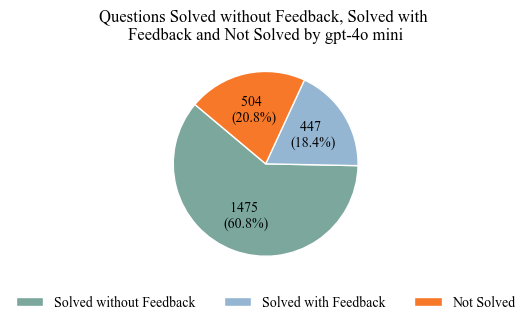

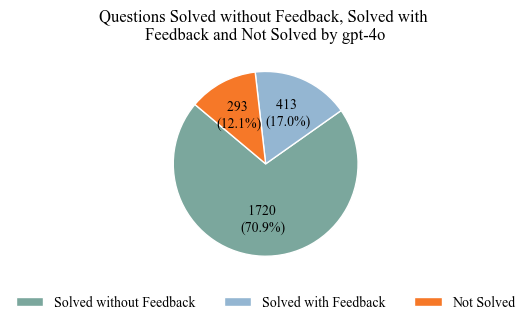

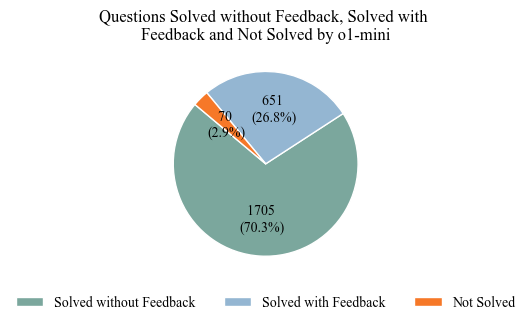

In [5]:
file_path = '.\Solutions\Run5\GPT4omini\ResponseList_gpt-4o-mini_no_order.xlsx'
df = pd.read_excel(file_path)
total_solved_pie(df, "gpt-4o mini", ".\ImagesAndGraphs")

file_path = '.\Solutions\Run5\GPT4o\ResponseList_gpt-4o_no_order.xlsx'
df = pd.read_excel(file_path)
total_solved_pie(df, "gpt-4o", ".\ImagesAndGraphs")

file_path = '.\Solutions\o1mini\ResponseList_o1-mini-no_order.xlsx'
df = pd.read_excel(file_path)
total_solved_pie(df, "o1-mini", ".\ImagesAndGraphs")

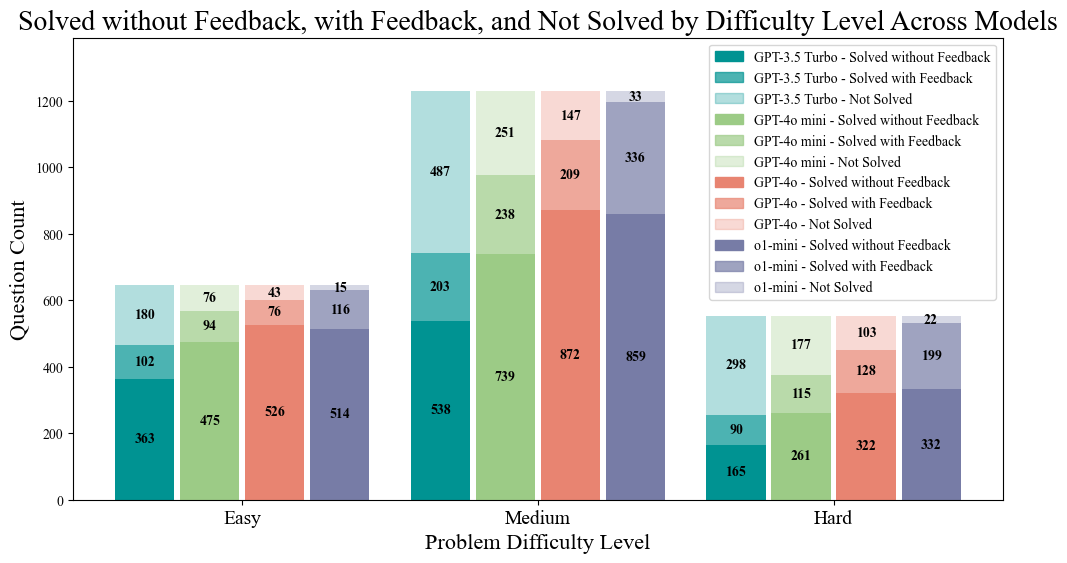

In [7]:
def dificulty_level_all_stacked():
    df_difficulty = pd.read_excel('.\LeetCode.xlsx')
    file_paths = [
        '.\Solutions\Run5\GPT3.5\ResponseList_gpt-3.5-turbo_no_order.xlsx',
        '.\Solutions\Run5\GPT4omini\ResponseList_gpt-4o-mini_no_order.xlsx',
        '.\Solutions\Run5\GPT4o\ResponseList_gpt-4o_no_order.xlsx',
        '.\Solutions\o1mini\ResponseList_o1-mini-no_order.xlsx'
    ]
    colors = ['#009392', '#9ccb86', '#e88471', '#777ca6']
    models = ['GPT-3.5 Turbo', 'GPT-4o mini', 'GPT-4o', 'o1-mini']
    difficulties = ['Easy', 'Medium', 'Hard']
    yes_1_counts, yes_other_counts, no_counts = {}, {}, {}
    solved = 'ChatGPT solved'
    iteration_number = 'Iteration Solved/ Failed'

    for model in models:
        yes_1_counts[model] = []
        yes_other_counts[model] = []
        no_counts[model] = []
    for idx, filepath in enumerate(file_paths):
        model_name = models[idx]
        df_response = pd.read_excel(filepath)
        df_merged = pd.merge(df_response, df_difficulty, on='Question Name')

        for difficulty in difficulties:
            df_diff = df_merged[df_merged['Question Difficulty'] == difficulty]
            yes_1_count = df_diff[(df_diff[solved] == 'Yes') & (df_diff[iteration_number] == 1)].shape[0]
            yes_other_count = df_diff[(df_diff[solved] == 'Yes') & (df_diff[iteration_number] > 1)].shape[0]
            no_count = df_diff[df_diff[solved] == 'No'].shape[0]
            yes_1_counts[model_name].append(yes_1_count)
            yes_other_counts[model_name].append(yes_other_count)
            no_counts[model_name].append(no_count)
    plt.rcParams["font.family"] = "Times New Roman"
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 1
    x = np.arange(len(difficulties)) * 5

    for idx, model in enumerate(models):
        color = colors[idx]
        x_positions_solved = x + idx * (bar_width + 0.1) - (bar_width + 0.1) * 1.5
        yes_1_heights = yes_1_counts[model]
        yes_other_heights = yes_other_counts[model]
        no_heights = no_counts[model]
        bars_yes_1 = ax.bar(x_positions_solved, yes_1_heights, bar_width, color=color,
                            label=f'Solved without Feedback ({model})')
        bars_yes_other = ax.bar(x_positions_solved, yes_other_heights, bar_width,
                                bottom=yes_1_heights, color=color, alpha=0.7,
                                label=f'Solved with Feedback ({model})')
        bars_no = ax.bar(x_positions_solved, no_heights, bar_width,
                         bottom=np.array(yes_1_heights) + np.array(yes_other_heights), color=color, alpha=0.3,
                         label=f'Not Solved ({model})')
        for bar, count in zip(bars_yes_1, yes_1_heights):
            height = count
            ax.text(bar.get_x() + bar.get_width() / 2., height / 2, '%d' % int(height), ha='center', va='center',
                    fontweight='bold',
                    color='black')
        for bar in bars_yes_other:
            height = bar.get_height() + bar.get_y()
            ax.text(bar.get_x() + bar.get_width() / 2., height - bar.get_height() / 2, '%d' % int(bar.get_height()),
                    fontweight='bold',
                    ha='center', va='center', color='black')
        for bar in bars_no:
            height = bar.get_height() + bar.get_y()
            ax.text(bar.get_x() + bar.get_width() / 2., height - bar.get_height() / 2, '%d' % int(bar.get_height()),
                    fontweight='bold',
                    ha='center', va='center', color='black')
    ax.set_title('Solved without Feedback, with Feedback, and Not Solved by Difficulty Level Across Models',
                 fontsize=20)
    ax.set_xlabel("Problem Difficulty Level", fontsize=16)
    ax.set_ylabel("Question Count", fontsize=16)
    tick_positions = (x +( (bar_width + 0.1)) / 2) - 0.55
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(difficulties, fontsize=14)
    handles = []
    for idx, model in enumerate(models):
        handles.append(plt.Rectangle((0, 0), 1, 1, color=colors[idx], label=f'{model} - Solved without Feedback'))
        handles.append(
            plt.Rectangle((0, 0), 1, 1, color=colors[idx], alpha=0.7, label=f'{model} - Solved with Feedback'))
        handles.append(plt.Rectangle((0, 0), 1, 1, color=colors[idx], alpha=0.3, label=f'{model} - Not Solved'))
    ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(0, current_ymax + 100)

    plt.show()
dificulty_level_all_stacked()

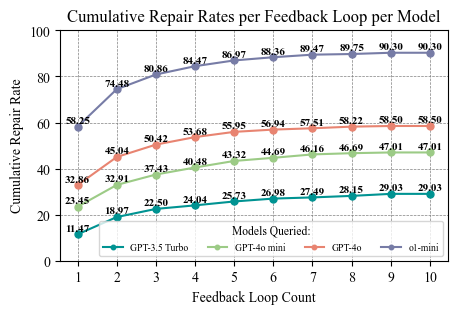

In [9]:
def calculate_repair_rate(df):
    solved = 'ChatGPT solved'
    iteration_number = 'Iteration Solved/ Failed'
    solved_wf = df[(df[solved] == 'Yes') & (df[iteration_number] != 1)].shape[0]
    df_filtered = df[(df[iteration_number] != 1) & (df[iteration_number] != 11)]
    repair_data = df_filtered.groupby(iteration_number)[solved].value_counts().unstack(fill_value=0)
    repair_data['Repair Rate'] = ((repair_data['Yes'] / solved_wf) * 100).round(2)

    return repair_data

def repair_rate_graph():
    file_paths = [
        '.\Solutions\Run5\GPT3.5\ResponseList_gpt-3.5-turbo_no_order.xlsx',
        '.\Solutions\Run5\GPT4omini\ResponseList_gpt-4o-mini_no_order.xlsx',
        '.\Solutions\Run5\GPT4o\ResponseList_gpt-4o_no_order.xlsx',
        '.\Solutions\o1mini\ResponseList_o1-mini-no_order.xlsx'
    ]
    colors = ['#009392', '#9ccb86', '#e88471', '#777ca6']
    solved = 'ChatGPT solved'
    legend_labels = ['GPT-3.5 Turbo', 'GPT-4o mini', 'GPT-4o', 'o1-mini']
    iteration_number = 'Iteration Solved/ Failed'
    all_repair_data = {}

    for idx, filepath in enumerate(file_paths):
        df = pd.read_excel(filepath)
        not_solved_count = df[df[solved] == 'No'].shape[0]
        solved_wf = df[(df[solved] == 'Yes') & (df[iteration_number] > 1)].shape[0]
        df_filtered = df[(df[iteration_number] > 1)]
        repair_data = df_filtered.groupby(iteration_number)[solved].value_counts().unstack(fill_value=0)
        repair_data['Repair Rate'] = ((repair_data['Yes'] / (solved_wf + not_solved_count)) * 100).round(2)
        repair_data_sorted = repair_data.sort_index()
        repair_data_sorted['Cumulative Repair Rate'] = repair_data_sorted['Repair Rate'].cumsum()

        all_repair_data[idx] = repair_data_sorted

    plt.figure(figsize=(5, 3))
    plt.rcParams["font.family"] = "Times New Roman"
    for idx, (key, repair_data_sorted) in enumerate(all_repair_data.items()):
        adjusted_index = repair_data_sorted.index - 1 
        plt.plot(
            adjusted_index,
            repair_data_sorted['Cumulative Repair Rate'],
            marker='o',
            color=colors[idx],
            markersize=5,
            label=legend_labels[idx]
        )
        for loop_count, cumulative_rate in zip(adjusted_index, repair_data_sorted['Cumulative Repair Rate']):
            plt.text(
                loop_count, cumulative_rate + 0.5,
                f'{cumulative_rate:.2f}',
                fontsize=8,
                ha='center',
                va='bottom',
                color='black',
                fontweight='bold'
            )
    plt.xticks(ticks=range(adjusted_index.min(), adjusted_index.max() + 1))
    plt.xlabel('Feedback Loop Count')
    plt.ylabel('Cumulative Repair Rate')
    plt.title(f'Cumulative Repair Rates per Feedback Loop per Model')
    plt.legend(title='Models Queried:', loc='lower right', ncol=4, fontsize='x-small', title_fontsize='small',
               markerscale=0.65) 
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    max_repair_rate = max(
        [repair_data_sorted['Cumulative Repair Rate'].max() for repair_data_sorted in all_repair_data.values()])
    plt.ylim(0, max_repair_rate + 10)

    plt.show()
repair_rate_graph()

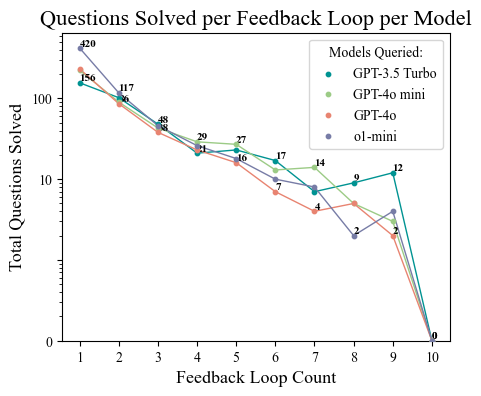

In [11]:
def log_plot():
    file_paths = [
        '.\Solutions\Run5\GPT3.5\ResponseList_gpt-3.5-turbo_no_order.xlsx',
        '.\Solutions\Run5\GPT4omini\ResponseList_gpt-4o-mini_no_order.xlsx',
        '.\Solutions\Run5\GPT4o\ResponseList_gpt-4o_no_order.xlsx',
        '.\Solutions\o1mini\ResponseList_o1-mini-no_order.xlsx'
    ]
    colors = ['#009392', '#9ccb86', '#e88471', '#777ca6']
    all_counts = []
    solved = 'ChatGPT solved'

    for filepath in file_paths:
        df = pd.read_excel(filepath)
        filtered_df = df[(df['Iteration Solved/ Failed'] > 1) & (df[solved] == 'Yes')]
        counts = filtered_df['Iteration Solved/ Failed'].value_counts().sort_index()
        all_counts.append(counts)
    combined_counts = pd.concat(all_counts, axis=1, keys=['GPT-3.5 Turbo', 'GPT-4o mini', 'GPT-4o', 'o1-mini']).fillna(0)
    combined_counts.loc[11] = [0.1, 0.1, 0.1, 0.1]
    combined_counts.replace(0, 0.1, inplace=True)  
    combined_counts = combined_counts[combined_counts.index != 1]

    fig, ax = plt.subplots(figsize=(5, 4))

    for i, (file_label, color) in enumerate(zip(combined_counts.columns, colors)):
        ax.scatter(combined_counts.index, combined_counts[file_label],
                   color=color, label=file_label, zorder=5, s=10)
        ax.plot(combined_counts.index, combined_counts[file_label],
                color=color, linestyle='-', linewidth=1, zorder=3)
    ax.set_yscale('log')
    ax.set_ylim(0.1, 650)  
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=3))
    def y_tick_format(value, _):
        if value == 0.1:
            return '0'
        elif value == 10:
            return '10'
        elif value == 100:
            return '100'
        return ''  

    ax.yaxis.set_major_formatter(FuncFormatter(y_tick_format))
    ax.set_xticks(range(2, 12))
    ax.set_xticklabels(range(1, 11))

    for x_value in combined_counts.index:
        y_values = combined_counts.loc[x_value]
        min_value = y_values.min()
        max_value = y_values.max()
        ax.text(x_value, min_value, f'{int(min_value)}' if min_value >= 1 else '0', fontsize=8, fontweight='bold',
                verticalalignment='bottom', horizontalalignment='left', color='black')
        ax.text(x_value, max_value, f'{int(max_value)}' if max_value >= 1 else '0', fontsize=8, fontweight='bold',
                verticalalignment='bottom', horizontalalignment='left', color='black')

    plt.xlabel('Feedback Loop Count', fontsize=13, fontname='Times New Roman')
    plt.ylabel('Total Questions Solved', fontsize=13, fontname='Times New Roman')
    plt.title('Questions Solved per Feedback Loop per Model', fontsize=16, fontname='Times New Roman')
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.legend(loc='upper right', title='Models Queried:', prop={'family': 'Times New Roman'})
    plt.show()
    
log_plot()